In [1]:
import numpy as np
from drift.robots import ETHModel
from drift.commons import Sequence
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def simulate_func(model):
    t = 0
    i = 0
    s = 0
    intervals = 20, 5  # left, right turn intervals

    while t <= 20:
        model.sequence(model.variables.group)

        if i <= intervals[0]:  # left turn
            s = np.radians(30)
            """ TODO
            discovered that np.radian(80) value previously passed to 
            the model was also converted to radians again. resulting 
            in a steering value of 0.02436939. 
            """
        elif intervals[0] < i < np.sum(intervals):  # right turn
            s = 0
        else:  # reset
            i = 0
        # s = np.radians(40) if t >= 5 else np.radians(80)
        # s = np.random.randint(0, 50)
        # s = np.radians(50)
        # s = np.radians(-80)
        # d = 0.5 if t >= 10 else 1
        d = 1
        model(s, d)
        i += 1
        t += model.variables.dt

In [5]:
np.radians(30)

0.5235987755982988

In [6]:
d1 = {
    'B': 8,
    'C': 10.49,
    'D': 1942,

    'Cm1': 1101,
    'Cm2': 15,  # this must be an odd number
    'Cr': 132,
    'Cd': 38,
}

/home/zadiq/dev/venvs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


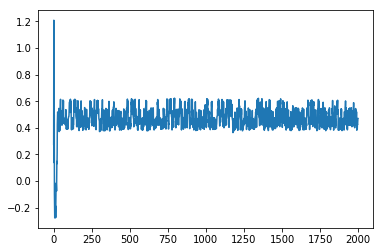

In [7]:
dynamics = [
    [8, 9.5, 2500, 1250, 3, 100, 45],
#     [6, 10.49, 1942, 1101, 15, 132, 38],
#     [8, 9.5, 2500, 1000, 5, 80, 40],
#     [8, 9.5, 2500, 1000, 5, 100, 30],
#     [6, 10.49, 1942, 1101, 15, 132, 38],
#     [6, 10.49, 1942, 1101, 3, 100, 45],
]
d_names =  ['B', 'C', 'D', 'Cm1', 'Cm2', 'Cr', 'Cd']

results = []

for dyn in dynamics:
    eth = ETHModel(imp=dict(zip(d_names, dyn)))
    simulate_func(eth)
    data = eth.sequence.data_as_array()
    plt.plot((np.arctan(data['0_vy'] / data['0_vx'])))

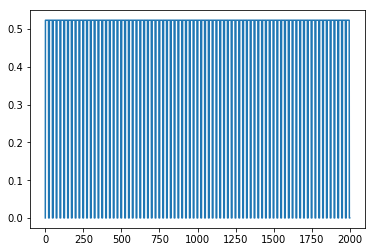

In [8]:
plt.plot(data['1_delta'])

In [9]:
# TODO: use percentile graph for showing angle or show the raw graph
ack_seq = Sequence.load("/home/zadiq/dev/@p/auto_drift/drift/notebooks/data/3d-analysis.sequence").data_as_array()

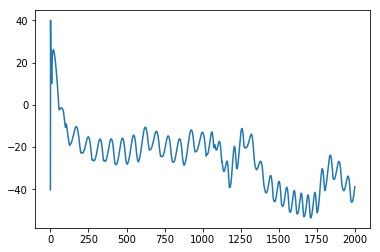

In [10]:
vx = ack_seq['current_state'][:, 0]
vy = ack_seq['current_state'][:, 1]
plt.plot(np.rad2deg(np.arctan(vy / vx)))

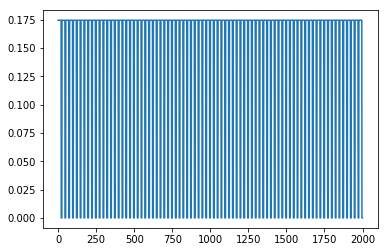

In [11]:
plt.plot(ack_seq['action'])

In [12]:
np.radians(15)

0.2617993877991494

In [13]:
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

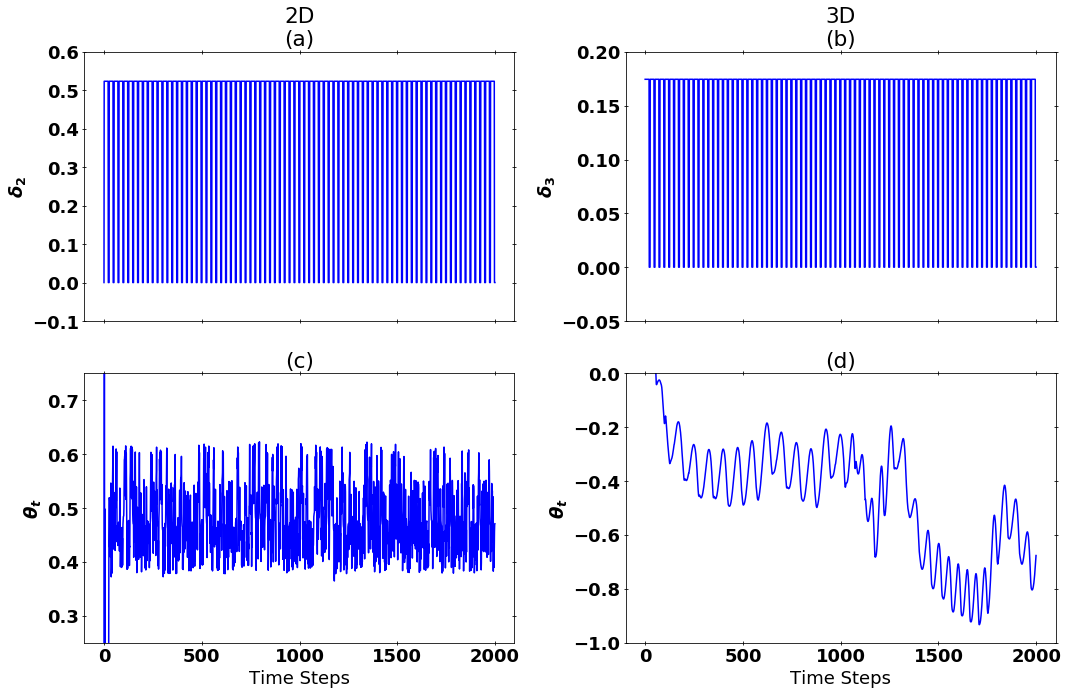

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True) 

eth_delta, ack_delta = axes[0]

eth_delta.plot(data['1_delta'], color='b')
eth_delta.set_title("2D\n(a)")
eth_delta.set_ylabel("$\delta_2$")
eth_delta.set_ylim(-0.1, 0.6)

ack_delta.plot(ack_seq['action'], color='b')
ack_delta.set_title("3D\n(b)")
ack_delta.set_ylabel("$\delta_3$")
ack_delta.set_ylim(-0.05, 0.2)

eth_tilt, ack_tilt = axes[1]

eth_tilt.plot(np.arctan2(data['0_vy'], data['0_vx']), color='b')
# eth_tilt.set_xlim(500, 1000)
eth_tilt.set_ylabel(r"$\theta_t$", weight="normal")
eth_tilt.set_xlabel(r"Time Steps", weight="normal")
eth_tilt.set_ylim(0.25, 0.75)
eth_tilt.set_title("(c)")

ack_tilt.plot(np.arctan2(vy, vx), color='b')
ack_tilt.set_ylabel(r"$\theta_t$", weight="normal")
ack_tilt.set_xlabel(r"Time Steps", weight="normal")
ack_tilt.set_ylim(-1, 0)
ack_tilt.set_title("(d)")


for ax in axes.flat:
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')        
    ax.tick_params('both', direction='inout')

fig.tight_layout()

# fig.savefig(f"images/manual_dyno_analysis.eps", format="eps", dpi=1000)

# Demonstration Tuning

In [40]:
ack_d_seq = Sequence.load("/home/zadiq/dev/@p/auto_drift/drift/notebooks/data/3d-demo-analysis.sequence").data_as_array()

In [41]:
vx = ack_d_seq['current_state'][:, 0]
vy = ack_d_seq['current_state'][:, 1]
omega = ack_d_seq['current_state'][:, 2]

In [48]:
def fplot(*args):
    
    ack_d_seq = Sequence.load("/home/zadiq/dev/@p/auto_drift/drift/notebooks/data/3d-demo-analysis.sequence").data_as_array()
    
    vx = ack_d_seq['current_state'][:, 0]
    vy = ack_d_seq['current_state'][:, 1]
    omega = ack_d_seq['current_state'][:, 2]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True) 

    top1, top2 = axes[0]
    top1.plot(vx, color='b', label="vx")
    top2.plot(vy, color='b', label="vy")

    bot1, bot2 = axes[1]
    bot1.plot(omega, color='b', label="omega")
    bot2.plot(np.rad2deg(np.arctan2(vy, vx)), color='b', label="tilt")
    bot2.set_ylim(-60, 60)

    for ax in axes.flat:
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')        
        ax.tick_params('both', direction='inout')

        ax.legend()
    fig.tight_layout()

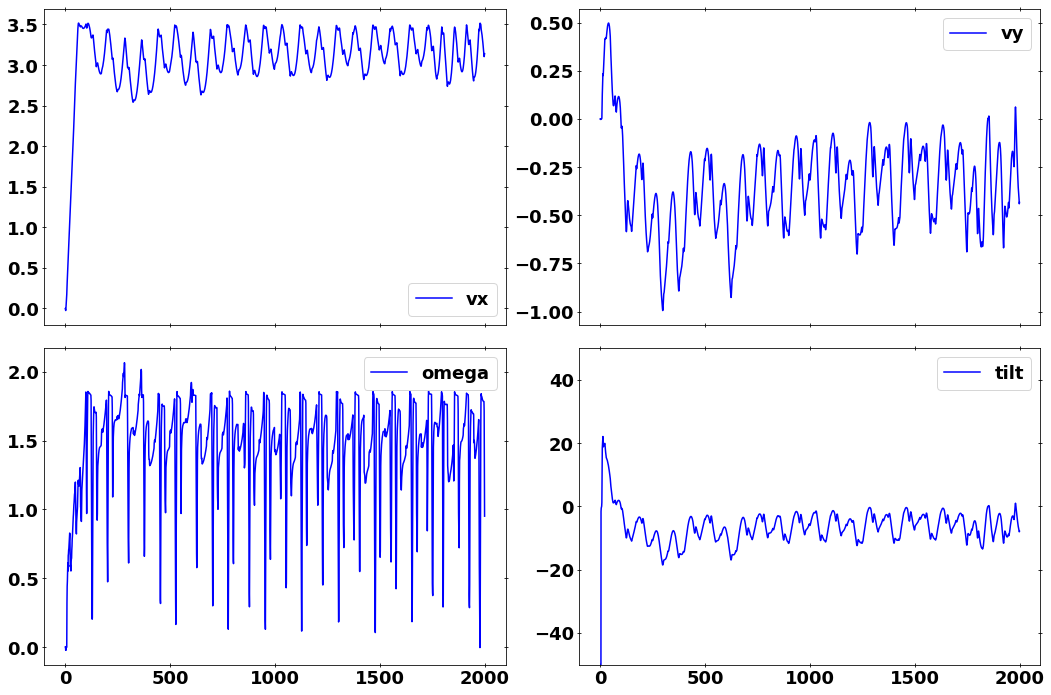

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True) 

top1, top2 = axes[0]
top1.plot(vx, color='b', label="vx")
top2.plot(vy, color='b', label="vy")

bot1, bot2 = axes[1]
bot1.plot(omega, color='b', label="omega")
bot2.plot(np.rad2deg(np.arctan2(vy, vx)), color='b', label="tilt")
bot2.set_ylim(-50, 50)

for ax in axes.flat:
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')        
    ax.tick_params('both', direction='inout')

    ax.legend()
fig.tight_layout()

# fig.savefig(f"images/manual_dyno_analysis.eps", format="eps", dpi=1000)
# .4, .4

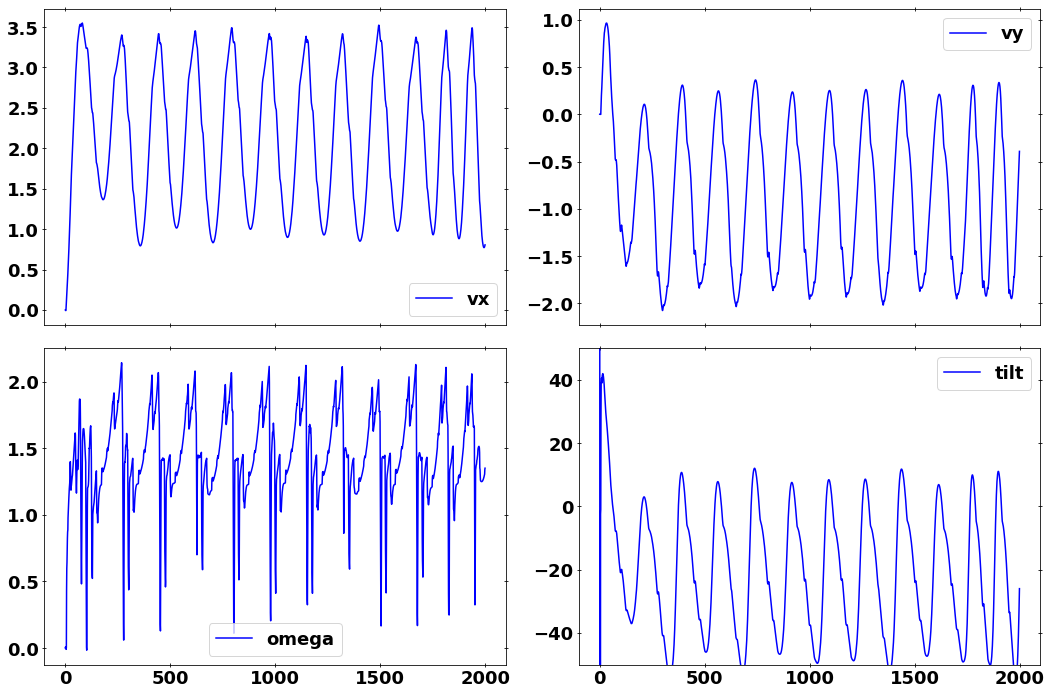

In [33]:
# 0.4, 0.2 

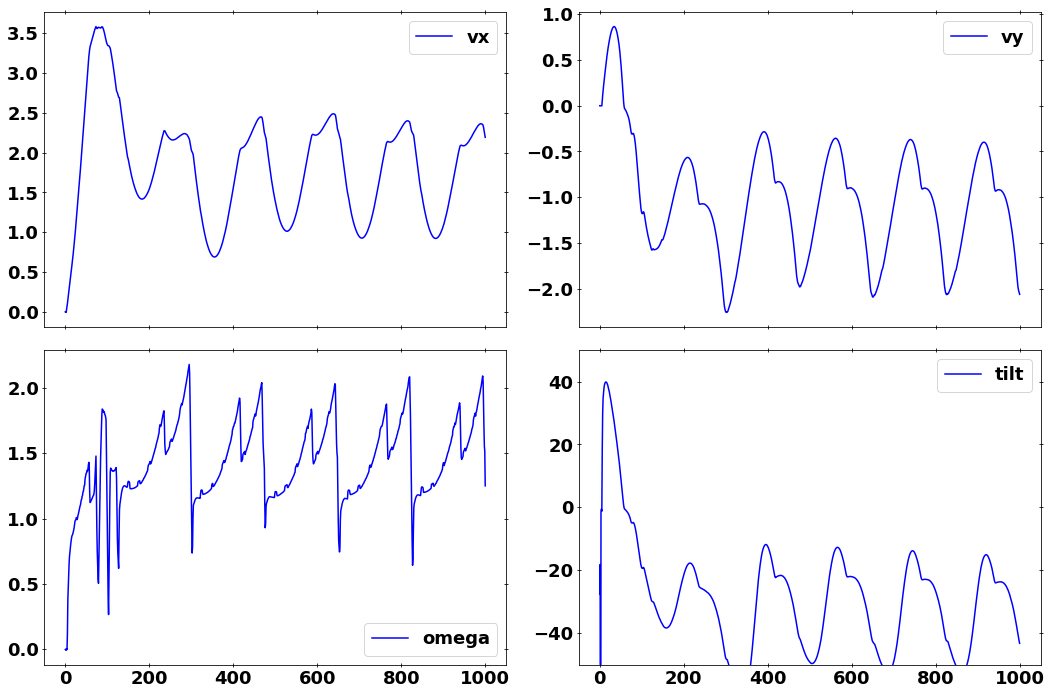

In [36]:
0.3, .2

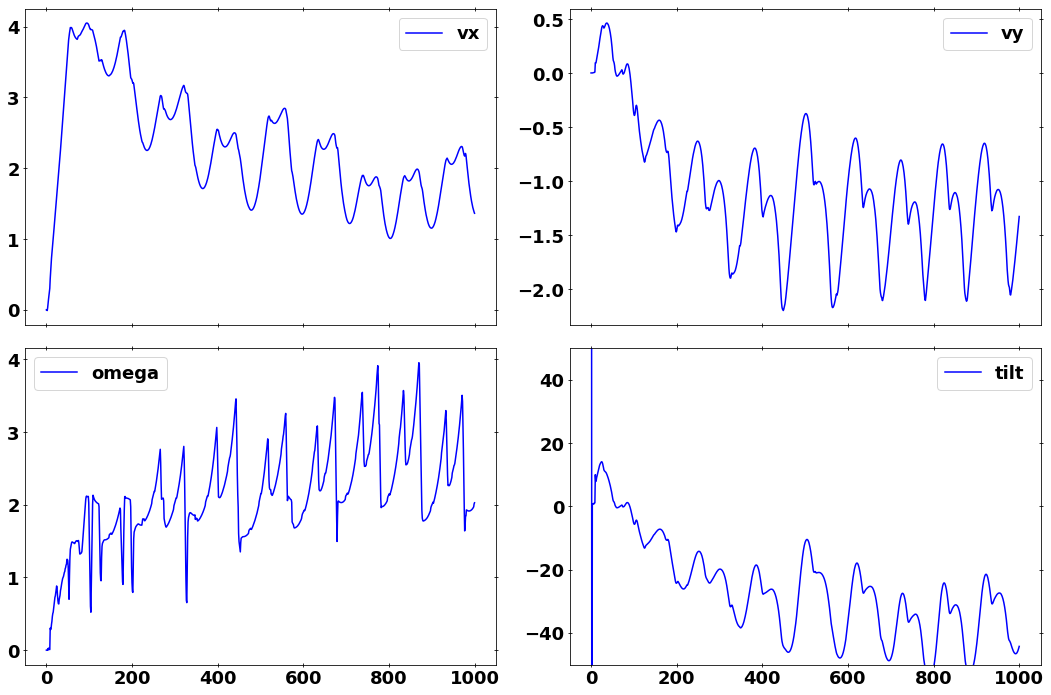

In [43]:
fplot(0.4, 0.5)

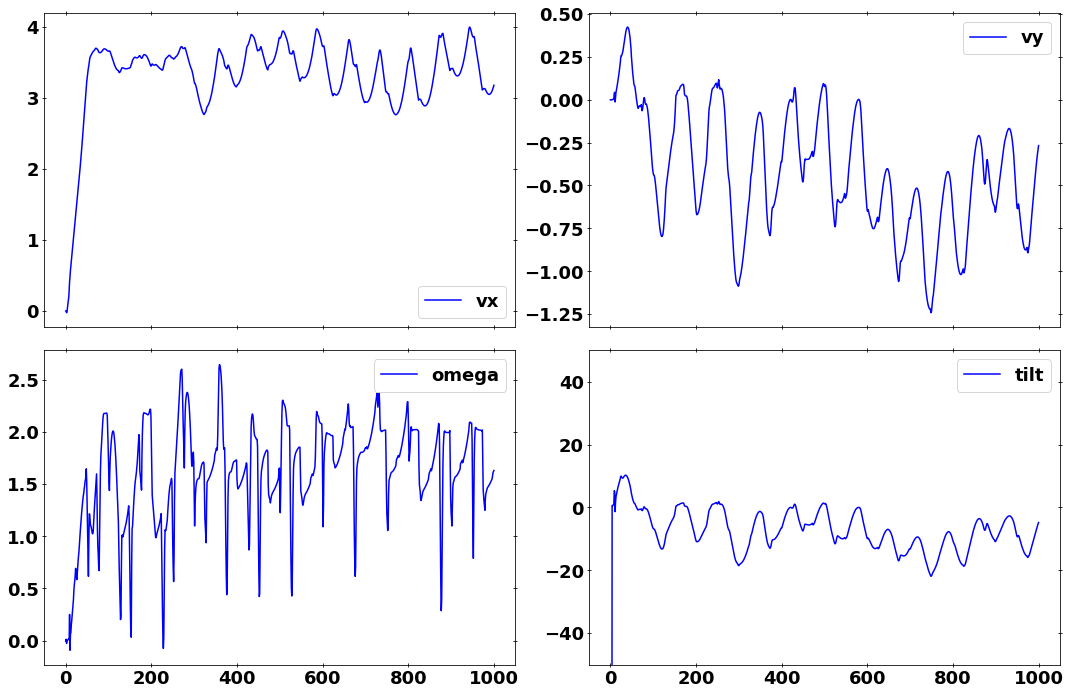

In [46]:
fplot(0.5, 0.5)

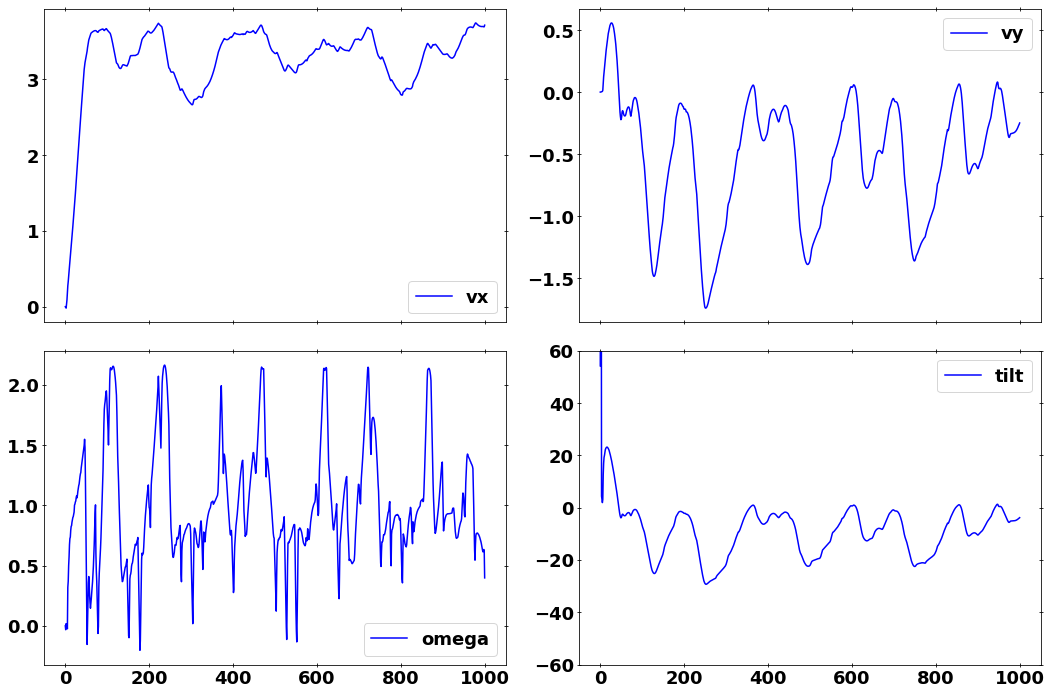

In [50]:
fplot(0.3, 0.35)

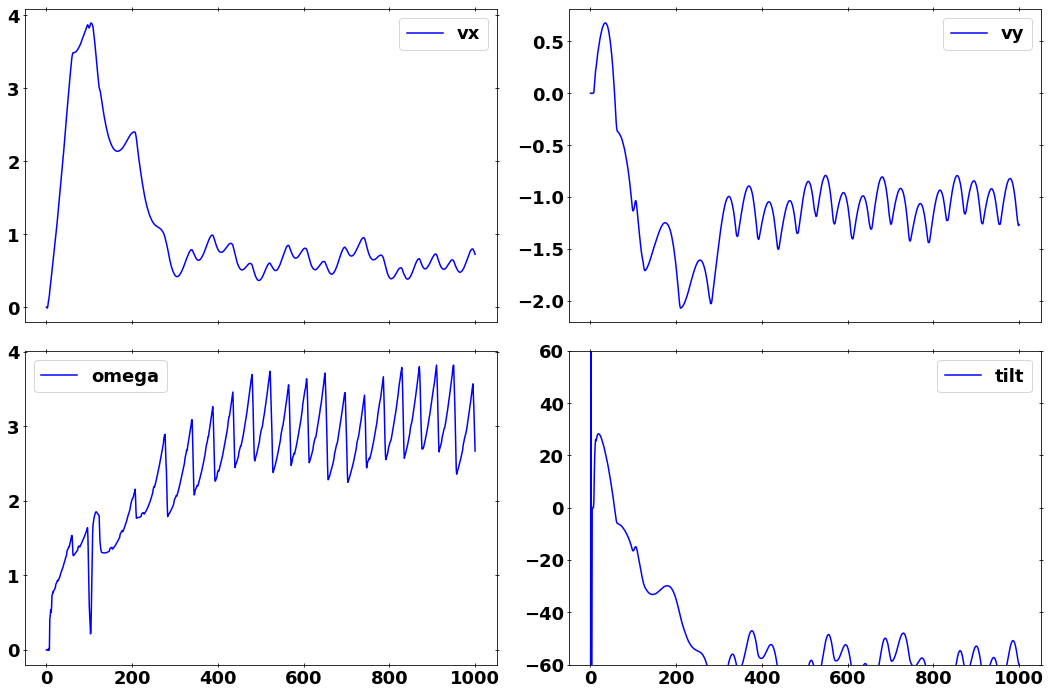

In [49]:
fplot(0.3, 0.3)

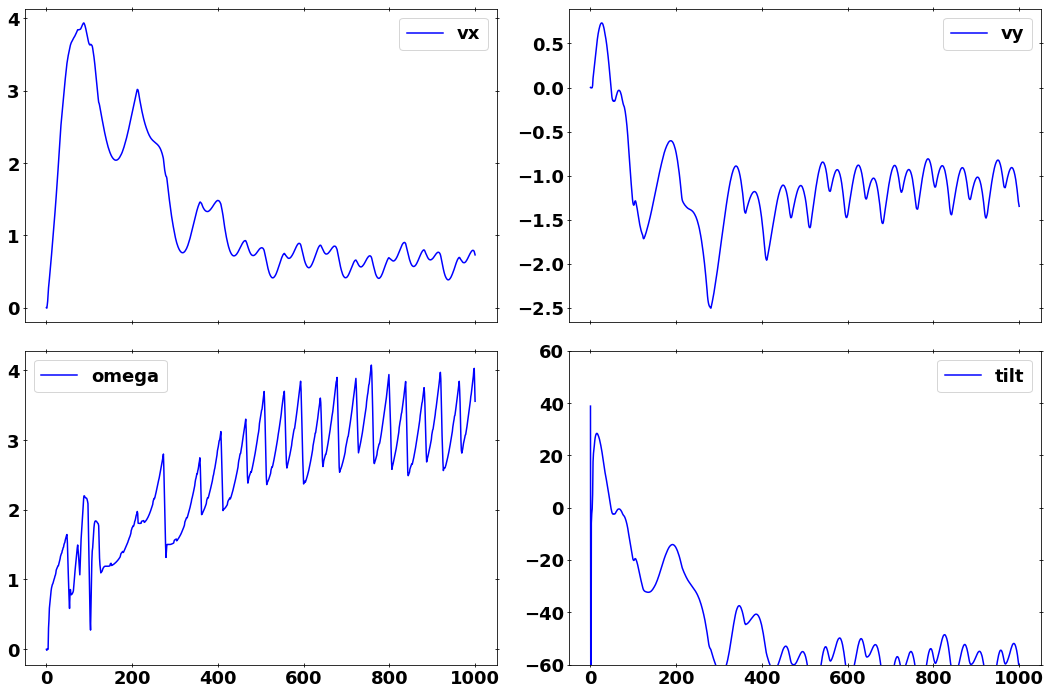

In [51]:
fplot(0.35, 0.3)

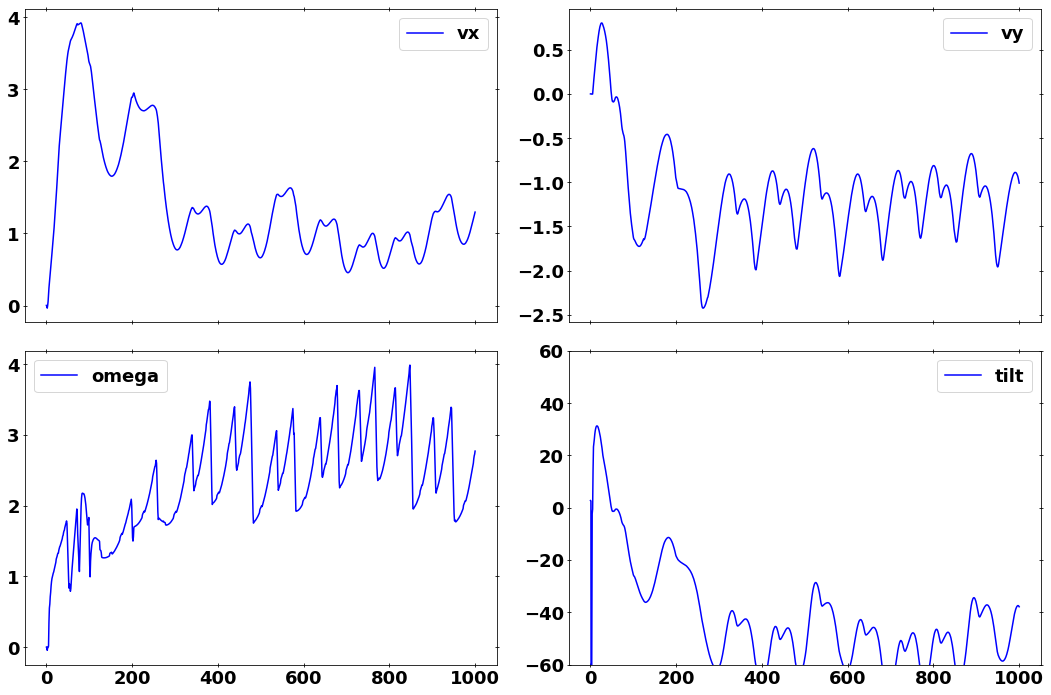

In [52]:
fplot(0.39, 0.3)

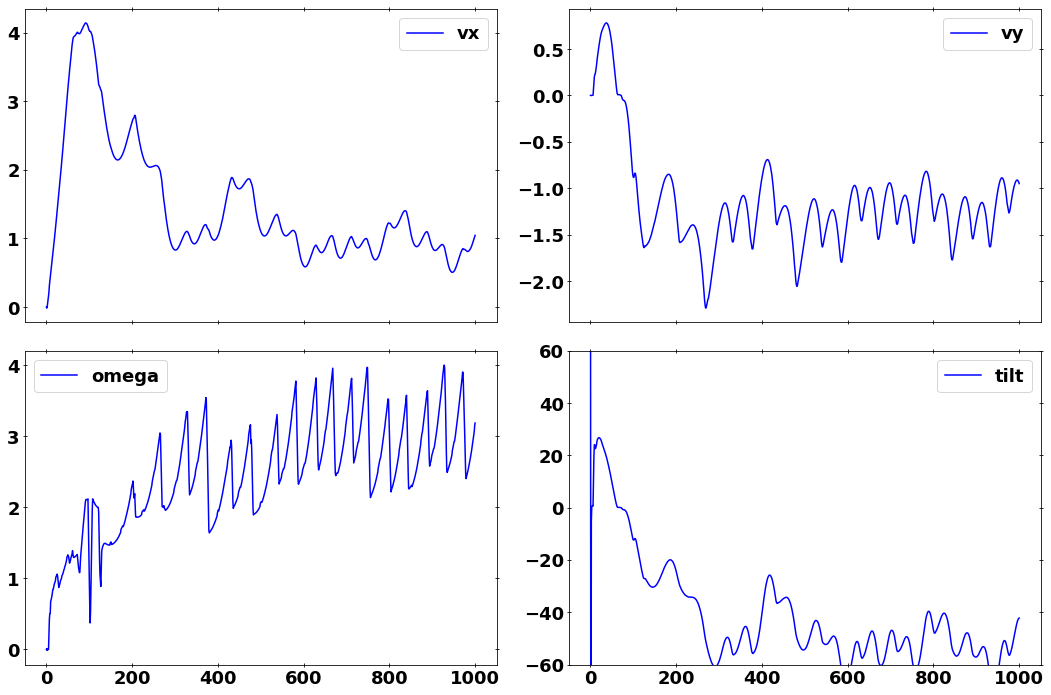

In [53]:
fplot(0.39, 0.35)

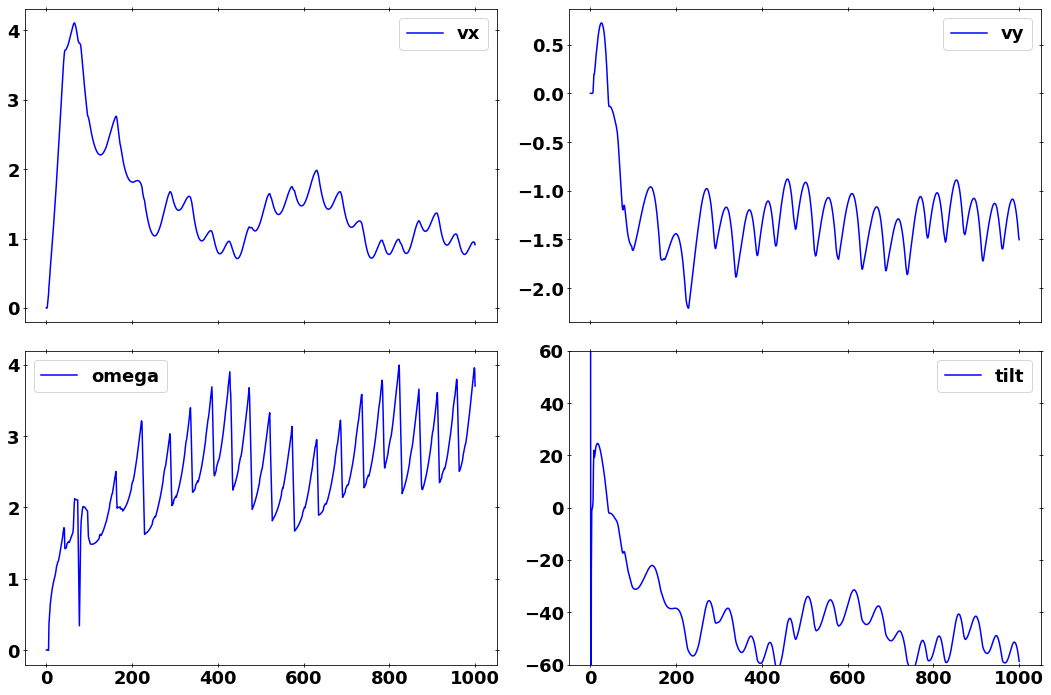

In [54]:
fplot(0.39, 0.37)